In [1]:
!nrnivmodl /home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod
from neuron import h
import plotly.graph_objects as go
import matplotlib.colors as mcolors
from neuron.units import ms, mV
import plotly.io as pio
from matplotlib import pyplot, cm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
from neuron import clear_gui_callback
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz
from numpy.linalg import pinv, eig
import numpy as np
from multiprocessing import Pool
font2={'family':'Times New Roman',
'weight':'bold',
'size': 10}
# 自定义刻度标签显示格式

from matplotlib.ticker import FuncFormatter
def format_func(value, tick_number):
    return f'{value:.0f}'  # 将刻度值格式化为小数点后两位

def plot_curve(ax2,x,y,color='black',title='', linestyle='-',xlim=[0,100],dx=20,
               ylim=[0,10],dy=5.0, fontsize=10, alpha = 1.0, xlabel='Time/ms', 
               ylabel = 'Frequency/Hz', label='',ynum_decimals =1, 
               nonscatter=True, s0=10, three_d=False, z=None):
    if nonscatter:
        
        if color:
            ax2.plot(x,y,color=color,linewidth=2,linestyle=linestyle,alpha=alpha, label=label)
        else:
            ax2.plot(x,y,linewidth=2,alpha=alpha, linestyle=linestyle,label=label)
    else:
        if color:
            ax2.scatter(x,y,color=color,linewidth=2,linestyle=linestyle,alpha=alpha, 
                        label=label, s=s0)
        else:
            ax2.scatter(x,y,linewidth=2,alpha=alpha, linestyle=linestyle,label=label,
                        s=s0)
    if three_d:
        ax2.scatter(x,y,z, color=color,linewidth=2,linestyle=linestyle,alpha=alpha, 
                        label=label, s=s0)
        
    ax2.set_xlabel(xlabel,fontsize=fontsize, weight='bold')
    ax2.set_ylabel(ylabel,fontsize=fontsize, weight='bold')
    
    # def format_funcx(value, tick_number, num_decimals=xnum_decimals):
    #     if num_decimals==0:
    #         return f'{value:.0f}'
    #     return f'{value:.{num_decimals}f}'

    def format_funcy(value, tick_number, num_decimals=ynum_decimals):
        if num_decimals==0:
          return f'{value:.0f}'
        return f'{value:.{num_decimals}f}'

    # if dx:
    #     ax2.set_xticks(np.arange(xlim[0], xlim[1] + dx, dx))
    #     ax2.set_xticklabels(ax2.get_xticks(), fontsize=fontsize, weight='bold')
    #     ax2.set_xlim([xlim[0], xlim[1]])
    #     ax2.xaxis.set_major_formatter(FuncFormatter(format_funcx))

    if dy:
        ax2.set_yticks(np.arange(ylim[0], ylim[1] + dy, dy))
        ax2.set_yticklabels(ax2.get_yticks(), fontsize=fontsize, weight='bold')
        ax2.set_ylim([ylim[0], ylim[1]])
        ax2.yaxis.set_major_formatter(FuncFormatter(format_funcy))
        
  
    if xlim:
       ax2.set_xticks(np.arange(xlim[0],xlim[1]+dx,dx))
       ax2.set_xticklabels(np.arange(xlim[0],xlim[1]+dx,dx),fontsize=10,weight='bold')
       ax2.set_xlim(xlim)
    # if ylim:
    #    ax2.set_yticks(np.arange(ylim[0],ylim[1]+dy,dy))
    #    ax2.set_yticklabels(np.arange(ylim[0],ylim[1]+dy,dy),fontsize=10,weight='bold')
    #    ax2.set_ylim(ylim)
    if title:
       ax2.set_title('{0}'.format(title),fontsize=12,weight='bold')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    if label:
       ax2.legend(loc='best',prop=font2,edgecolor='white')

h.load_file('nrngui.hoc')
h.load_file("import3d.hoc")

morphologyFilename = "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/morphologies/cell1.asc"
biophysicalModelFilename = "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/models/L5PCbiophys1.hoc"
biophysicalModelTemplateFilename = "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/models/L5PCtemplate.hoc"

h.load_file(biophysicalModelFilename)
h.load_file(biophysicalModelTemplateFilename)

    

/home/wzl/anaconda/envs/neuron9/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
INFO : Using neuron-nightly Package (Developer Version)
/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron
cfiles =
Mod files: "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/CaDynamics_E2.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/Ca_HVA.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/Ca_LVAst.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/epsp.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/Ih.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/Im.mod" "/home/wzl/LFPy/project/conductance_measurement/real

--No graphics will be displayed.


1.0

In [2]:
font2={'family':'Times New Roman',
'weight':'bold',
'size': 10}

from matplotlib.ticker import FuncFormatter
def format_func(value, tick_number):
    return f'{value:.0f}'  # 将刻度值格式化为小数点后两位

def plot_curve(ax2,x,y,z, cmap='coolwarm',title='', linestyle='-',xlim=[0,100],dx=20,
               ylim=[0,10],dy=5.0, fontsize=10, alpha = 1.0, xlabel='Time/ms', zlabel='',
               ylabel = 'Frequency/Hz', label='',ynum_decimals =1,xnum_decimals =1, zlim=[0,100],dz=20,
               nonscatter=True, s0=10, nondoubley=True, plottype = 'scatter'):
    if plottype=='scatter':
        surf = ax2.scatter(x, y, z,  c=z, cmap=cmap, s=50, alpha=0.7, edgecolor='w')
    else:
        surf = ax2.plot_trisurf(x, y, z, cmap=cmap, edgecolor='none', alpha=0.8)
        
    ax2.set_xlabel(xlabel,font2)
    ax2.set_ylabel(ylabel,font2)
    ax2.set_zlabel(zlabel,font2)

    
    def format_funcx(value, tick_number, num_decimals=xnum_decimals):
        if num_decimals==0:
            return f'{value:.0f}'
        return f'{value:.{num_decimals}f}'

    def format_funcy(value, tick_number, num_decimals=ynum_decimals):
        if num_decimals==0:
          return f'{value:.0f}'
        return f'{value:.{num_decimals}f}'

    # if dx:
    #     ax2.set_xticks(np.arange(xlim[0], xlim[1] + dx, dx))
    #     ax2.set_xticklabels(ax2.get_xticks(), fontsize=fontsize, weight='bold')
    #     ax2.set_xlim([xlim[0], xlim[1]])
    #     ax2.xaxis.set_major_formatter(FuncFormatter(format_funcx))

    if dy:
        ax2.set_yticks(np.arange(ylim[0], ylim[1] + dy, dy))
        ax2.set_yticklabels(ax2.get_yticks(), fontsize=fontsize, weight='bold')
        ax2.set_ylim([ylim[0], ylim[1]])
        ax2.yaxis.set_major_formatter(FuncFormatter(format_funcy))
        
  
    if dx:
       ax2.set_xticks(np.arange(xlim[0],xlim[1]+dx,dx))
       ax2.set_xticklabels(np.arange(xlim[0],xlim[1]+dx,dx),fontsize=10,weight='bold')
       ax2.set_xlim(xlim)
       ax2.xaxis.set_major_formatter(FuncFormatter(format_funcx))
       
    if dz:
       ax2.set_zticks(np.arange(zlim[0],zlim[1]+dz,dz))
       ax2.set_zticklabels(np.arange(zlim[0],zlim[1]+dz,dz),fontsize=10,weight='bold')
       ax2.set_zlim(zlim)
       ax2.zaxis.set_major_formatter(FuncFormatter(format_funcx))
    # if ylim:
    #    ax2.set_yticks(np.arange(ylim[0],ylim[1]+dy,dy))
    #    ax2.set_yticklabels(np.arange(ylim[0],ylim[1]+dy,dy),fontsize=10,weight='bold')
    #    ax2.set_ylim(ylim)
    if title:
       ax2.set_title('{0}'.format(title),fontsize=12,weight='bold')
    ax2.spines['top'].set_visible(False)
    if nondoubley:
        ax2.spines['right'].set_visible(False)
    if label:
       ax2.legend(loc='best',prop=font2,edgecolor='white')
    # ax2.grid(False)
    return surf

0.0746802999053033


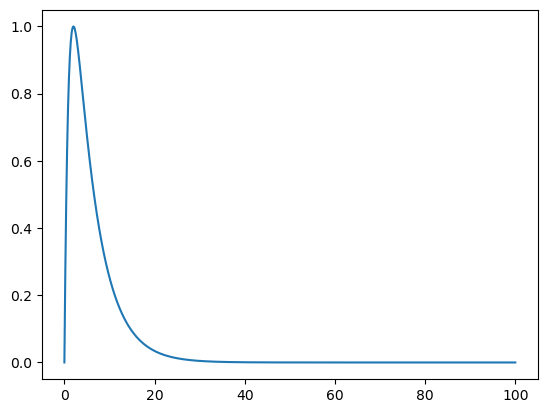

In [3]:
run_dt=0.1
syn_tau1 = 1.
syn_tau2 = 5.
t=np.arange(0,100+run_dt,run_dt)
NE = ((syn_tau1/syn_tau2)**(syn_tau1/(syn_tau2-syn_tau1))-(syn_tau1/syn_tau2)**(syn_tau2/(syn_tau2-syn_tau1)))**-1
uE = NE*(np.exp(-t/syn_tau2)-np.exp(-t/syn_tau1))
plt.plot(t,uE)
ground_truth = np.mean(uE)
print(ground_truth)

In [5]:
# distance and diameter
L5PC = h.L5PCtemplate(morphologyFilename)
distance = []
diameter = []
g_pas = []
for i in range(84):
    distance.append(h.distance(L5PC.soma[0](0.5),L5PC.dend[i](0.5)))
    diameter.append(L5PC.dend[i](0.5).diam)
    g_pas.append(L5PC.dend[i](0.5).g_pas)
for i in range(109):
    distance.append(h.distance(L5PC.soma[0](0.5),L5PC.apic[i](0.5)))
    diameter.append(L5PC.apic[i](0.5).diam)
    g_pas.append(L5PC.apic[i](0.5).g_pas)
print(np.min(distance),np.max(distance))
print(np.min(diameter),np.max(diameter))
print(len(distance))
print(len(diameter))

5.423078824488954 1254.5855898376617
0.2599999904632567 4.08698291062178
193
193


# mean local conductance

In [6]:
# mean local conductance error
estimated_mean_cond_apic= np.loadtxt("/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/local_conductance/estimated_mean_cond_passive_apicloc109_fE5e4.txt")
estimated_mean_cond_us_apic = estimated_mean_cond_apic[:,0]
estimated_mean_cond_trad_apic = estimated_mean_cond_apic[:,1]

estimated_mean_cond_dend= np.loadtxt("/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/local_conductance/estimated_mean_cond_passive_dendloc84_fE5e4.txt")
estimated_mean_cond_us_dend = estimated_mean_cond_dend[:,0]
estimated_mean_cond_trad_dend = estimated_mean_cond_dend[:,1]

fE = 5e-4
ge =  fE*ground_truth
estimated_mean_cond_us = np.concatenate((estimated_mean_cond_us_dend, estimated_mean_cond_us_apic))
estimated_mean_cond_trad = np.concatenate((estimated_mean_cond_trad_dend, estimated_mean_cond_trad_apic))
error_us = np.abs(estimated_mean_cond_us-ge)
error_trad = np.abs(estimated_mean_cond_trad-ge)

In [7]:
# 假设您的数据 (x, y, z)
x = diameter  # 替换为您的 x 数据
y = distance        # 替换为您的 y 数据
z = error_us   # 替换为您的 z 数据
print(np.min(x),np.max(x))
print(np.min(y),np.max(y))
print(np.min(z),np.max(z))

0.2599999904632567 4.08698291062178
5.423078824488954 1254.5855898376617
1.9805439757561005e-10 1.3731567539498143e-05


<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_2973084/60140144.py:15: SyntaxWarning: invalid escape sequence '\m'
  ylim=[0,1300],dy=650, fontsize=10, alpha = 1.0, xlabel='Diameter ($\mu m$)', zlim=[0,1.4e-5], dz=0.7e-5,
/tmp/ipykernel_2973084/60140144.py:16: SyntaxWarning: invalid escape sequence '\m'
  ylabel = 'Path distance ($\mu m$)', zlabel='Error', label='',ynum_decimals =0,xnum_decimals =0,
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: 

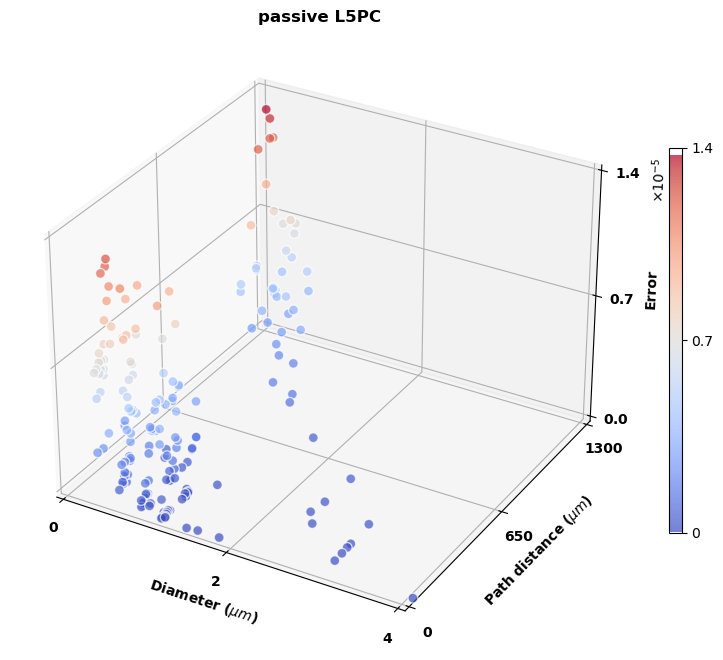

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 假设您的数据 (x, y, z)
x = diameter[:]  # 替换为您的 x 数据
y = distance[:]        # 替换为您的 y 数据
z = error_us[:]   # 替换为您的 z 数据

# 创建画布和三维坐标系
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

surf=plot_curve(ax,x,y,z, cmap='coolwarm',title='passive L5PC', linestyle='-',xlim=[0,4], dx=2,
               ylim=[0,1300],dy=650, fontsize=10, alpha = 1.0, xlabel='Diameter ($\mu m$)', zlim=[0,1.4e-5], dz=0.7e-5,
               ylabel = 'Path distance ($\mu m$)', zlabel='Error', label='',ynum_decimals =0,xnum_decimals =0, 
               nonscatter=True, s0=10, nondoubley=True, plottype = 'scatter')
from matplotlib.ticker import ScalarFormatter
ax.zaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# ax.scatter(x, y, z,  c='black', s=2, alpha=0.2)


# # 使用 trisurf 绘制三维表面图
# surf = ax.plot_trisurf(x, y, z, cmap='coolwarm', edgecolor='none', alpha=0.8)

# # 设置坐标轴标签
# ax.set_xlabel('Diameter ($\mu m$)', fontsize=12, weight='bold', labelpad=20)
# ax.set_ylabel('Path distance ($\mu m$)', fontsize=12, weight='bold', labelpad=20)
# ax.set_zlabel('Relative Error', fontsize=12, weight='bold', labelpad=20)

# 显示颜色条
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=30)

# 设置 colorbar 的刻度标签
cbar.set_ticks([0, 0.7e-5, 1.4e-5])  # 设置刻度位置
cbar.set_ticklabels(['0', '0.7', '1.4'])  

plt.savefig('error_diameter_distance_L5PCpassive.eps', format='eps', dpi=1000)

# 显示图形
plt.show()


<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_2192203/3908520963.py:15: SyntaxWarning: invalid escape sequence '\m'
  ylim=[0,1300],dy=650, fontsize=10, alpha = 1.0, xlabel='Diameter ($\mu m$)', zlim=[0,40], dz=20,
/tmp/ipykernel_2192203/3908520963.py:16: SyntaxWarning: invalid escape sequence '\m'
  ylabel = 'Path distance ($\mu m$)', zlabel='Relative error', label='',ynum_decimals =0,xnum_decimals =0,
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


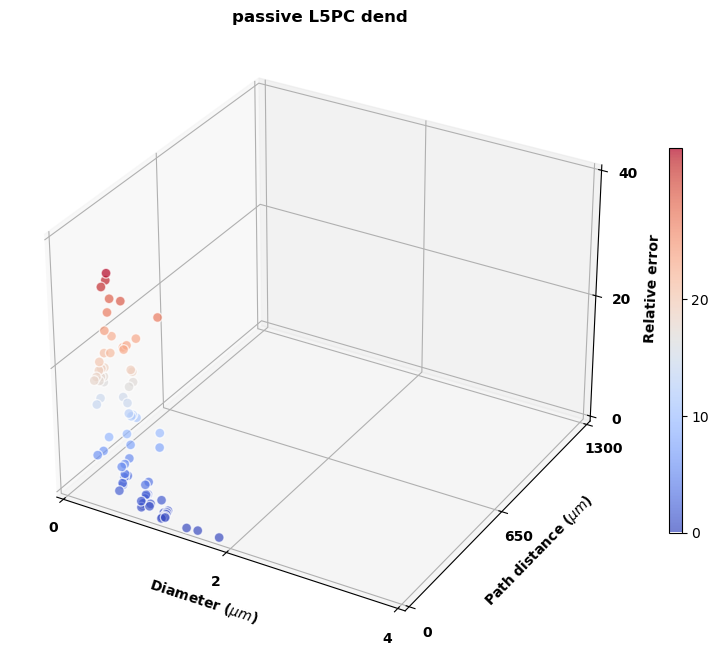

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 假设您的数据 (x, y, z)
x = diameter[:84]  # 替换为您的 x 数据
y = distance[:84]        # 替换为您的 y 数据
z = error_us[:84]*100   # 替换为您的 z 数据

# 创建画布和三维坐标系
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

surf=plot_curve(ax,x,y,z, cmap='coolwarm',title='passive L5PC dend', linestyle='-',xlim=[0,4], dx=2,
               ylim=[0,1300],dy=650, fontsize=10, alpha = 1.0, xlabel='Diameter ($\mu m$)', zlim=[0,40], dz=20,
               ylabel = 'Path distance ($\mu m$)', zlabel='Relative error', label='',ynum_decimals =0,xnum_decimals =0, 
               nonscatter=True, s0=10, nondoubley=True, plottype = 'scatter')
# ax.scatter(x, y, z,  c='black', s=2, alpha=0.2)


# # 使用 trisurf 绘制三维表面图
# surf = ax.plot_trisurf(x, y, z, cmap='coolwarm', edgecolor='none', alpha=0.8)

# # 设置坐标轴标签
# ax.set_xlabel('Diameter ($\mu m$)', fontsize=12, weight='bold', labelpad=20)
# ax.set_ylabel('Path distance ($\mu m$)', fontsize=12, weight='bold', labelpad=20)
# ax.set_zlabel('Relative Error', fontsize=12, weight='bold', labelpad=20)

# 显示颜色条
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=30)

# 设置 colorbar 的刻度标签
cbar.set_ticks([0, 10, 20])  # 设置刻度位置
cbar.set_ticklabels(['0', '10', '20'])  

# 显示图形
plt.show()


# location

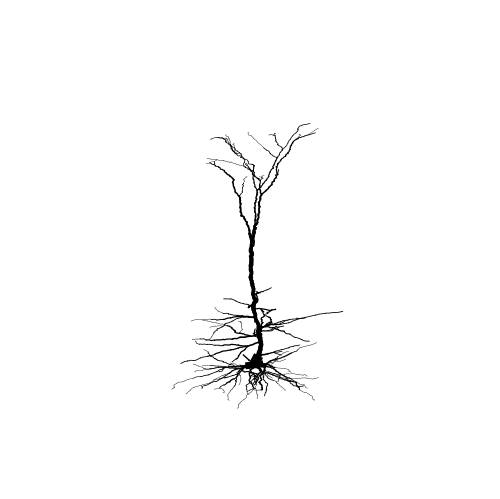

In [ ]:
# dend
from neuron import h
from matplotlib import pyplot as plt

# 你的模型初始化和配置代码
L5PC = h.L5PCtemplate(morphologyFilename)
L5PC.soma[0].diam = 5.

# 绘图设置
ps = h.PlotShape(False)  # 创建PlotShape对象
ps.show(0)  # 不自动显示NEURON的窗口

# 使用Matplotlib进行绘图
ax = ps.plot(plt)


# for i in range(84):
#     sec=L5PC.dend[i]
#     ax.scatter([(sec.x3d(0)+sec.x3d(1))/2], [(sec.y3d(0)+sec.y3d(1))/2],[(sec.z3d(0)+sec.z3d(1))/2], 
#                     color='indianred', s=5, marker='o', label='')


# # 设置坐标轴范围
ax.set_xlim([-300, 300])  # 设置x轴范围
ax.set_ylim([0, 1400])  # 设置y轴范围
ax.set_zlim([-600, 0])  # 设置z轴范围

# ps.view(-400,0, 0, 300, 0, 300, 100, 500)
ax.view_init(elev=280, azim=98)
ax.grid(False)
# ax.set_title('dend')
# 关闭坐标轴
ax.axis('off')
plt.savefig("/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/figure/figure4/passive_pyramidal.eps", format='eps', dpi=300)
plt.show()


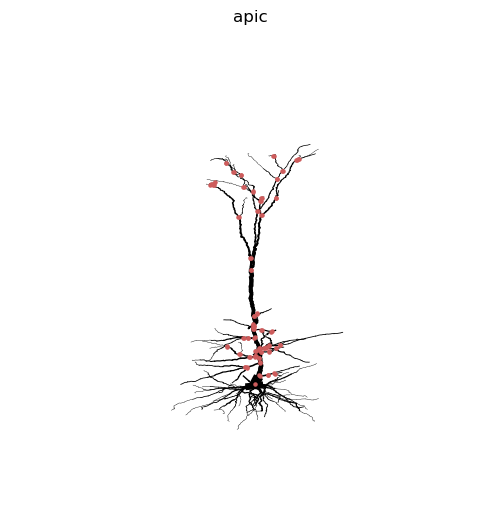

In [47]:
# apic
from neuron import h
from matplotlib import pyplot as plt

# 你的模型初始化和配置代码
L5PC = h.L5PCtemplate(morphologyFilename)
L5PC.soma[0].diam = 5.

# 绘图设置
ps = h.PlotShape(False)  # 创建PlotShape对象
ps.show(0)  # 不自动显示NEURON的窗口

# 使用Matplotlib进行绘图
ax = ps.plot(plt)

for i in range(109):
    sec=L5PC.apic[i]
    ax.scatter([(sec.x3d(0)+sec.x3d(1))/2], [(sec.y3d(0)+sec.y3d(1))/2],[(sec.z3d(0)+sec.z3d(1))/2], 
                    color='indianred', s=5, marker='o', label='')


# # 设置坐标轴范围
ax.set_xlim([-300, 300])  # 设置x轴范围
ax.set_ylim([0, 1400])  # 设置y轴范围
ax.set_zlim([-600, 0])  # 设置z轴范围

# ps.view(-400,0, 0, 300, 0, 300, 100, 500)
ax.view_init(elev=280, azim=98)
ax.grid(False)
ax.set_title('apic')
# 关闭坐标轴
ax.axis('off')
plt.savefig("/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/figure/figure4/apic_location.eps", format='eps', dpi=300)
plt.show()


<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_2192203/3727894784.py:15: SyntaxWarning: invalid escape sequence '\m'
  ylim=[0,1300],dy=650, fontsize=10, alpha = 1.0, xlabel='Diameter ($\mu m$)', zlim=[0,40], dz=20,
/tmp/ipykernel_2192203/3727894784.py:16: SyntaxWarning: invalid escape sequence '\m'
  ylabel = 'Path distance ($\mu m$)', zlabel='Relative error', label='',ynum_decimals =0,xnum_decimals =0,
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


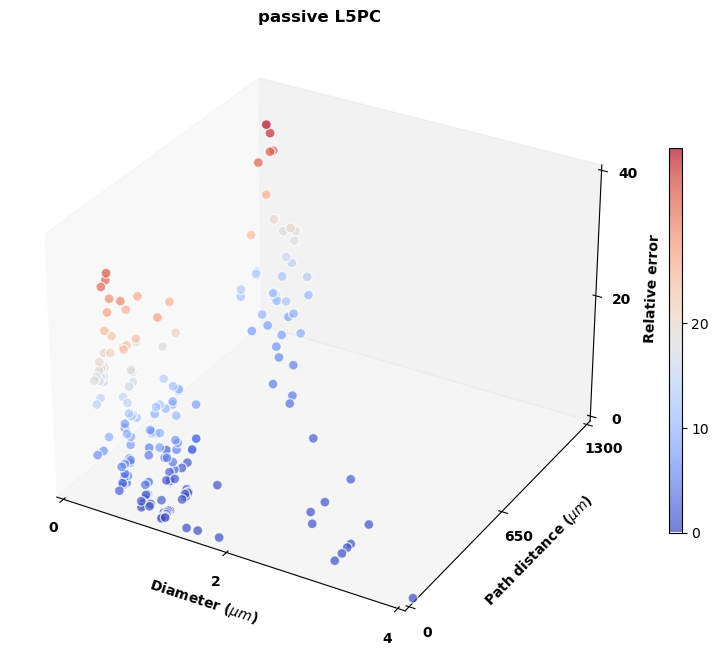

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 假设您的数据 (x, y, z)
x = diameter  # 替换为您的 x 数据
y = distance        # 替换为您的 y 数据
z = error_us*100   # 替换为您的 z 数据

# 创建画布和三维坐标系
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

surf=plot_curve(ax,x,y,z, cmap='coolwarm',title='passive L5PC', linestyle='-',xlim=[0,4], dx=2,
               ylim=[0,1300],dy=650, fontsize=10, alpha = 1.0, xlabel='Diameter ($\mu m$)', zlim=[0,40], dz=20,
               ylabel = 'Path distance ($\mu m$)', zlabel='Relative error', label='',ynum_decimals =0,xnum_decimals =0, 
               nonscatter=True, s0=10, nondoubley=True, plottype = 'scatter')
# ax.scatter(x, y, z,  c='black', s=2, alpha=0.2)


# # 使用 trisurf 绘制三维表面图
# surf = ax.plot_trisurf(x, y, z, cmap='coolwarm', edgecolor='none', alpha=0.8)

# # 设置坐标轴标签
# ax.set_xlabel('Diameter ($\mu m$)', fontsize=12, weight='bold', labelpad=20)
# ax.set_ylabel('Path distance ($\mu m$)', fontsize=12, weight='bold', labelpad=20)
# ax.set_zlabel('Relative Error', fontsize=12, weight='bold', labelpad=20)

# 显示颜色条
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=30)

# 设置 colorbar 的刻度标签
cbar.set_ticks([0, 10, 20])  # 设置刻度位置
cbar.set_ticklabels(['0', '10', '20'])  

# 显示图形
plt.show()


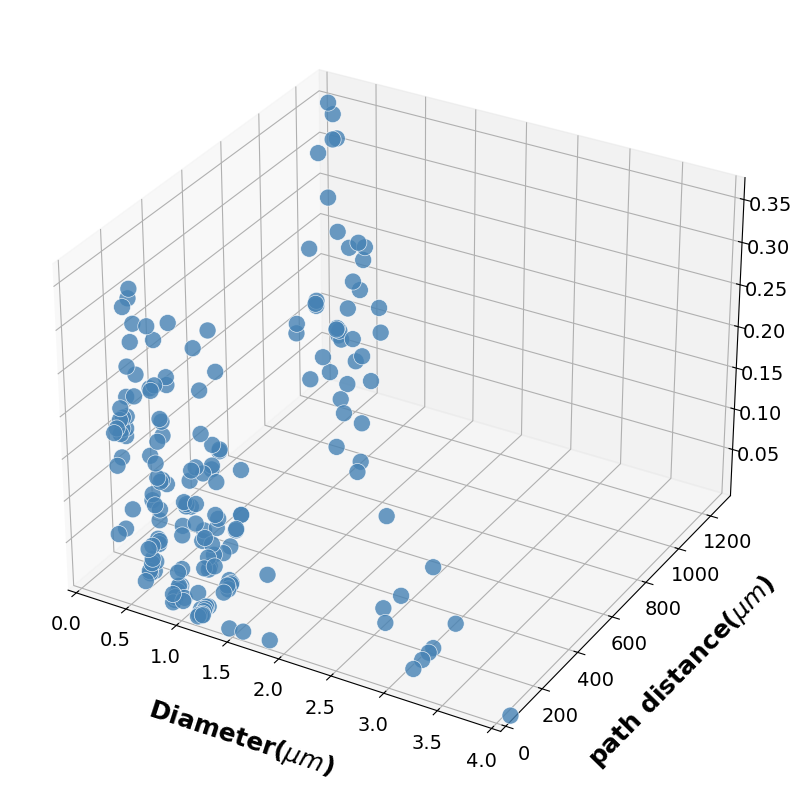

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure( figsize = (10,10))
ax2 = fig.add_subplot(111,projection='3d')

x = diameter
y = distance
z=error_us
color='steelblue'
xlim=[0,4]
dx=2
ylim=[0,1300]
dy=650
fontsize=18
alpha = 0.8
xlabel='Diameter'+r'($\mu m$)'
ylabel = 'path distance'+r'($\mu m$)'
zlabel = 'relative error'
ynum_decimals =1
s0=150


# 绘制三维散点图
sc = ax2.scatter(x, y, z, color=color, alpha=alpha, s=s0, edgecolor='w', linewidth=0.5)

# 设置坐标轴标签
ax2.set_xlabel(xlabel, fontsize=fontsize, weight='bold', labelpad=20)
ax2.set_ylabel(ylabel, fontsize=fontsize, weight='bold', labelpad=20)
ax2.set_zlabel(zlabel, fontsize=fontsize, weight='bold', labelpad=20)

# 设置坐标轴范围
ax2.set_xlim(xlim)
ax2.set_ylim(ylim)
ax2.set_zlim([min(z), max(z)])

# 美化刻度
ax2.tick_params(axis='both', which='major', labelsize=fontsize-4)
ax2.tick_params(axis='z', which='major', labelsize=fontsize-4)

# 添加网格
ax2.grid(True, linestyle='--', alpha=0.5)

# 显示图形
plt.show()



# synaptic time constants

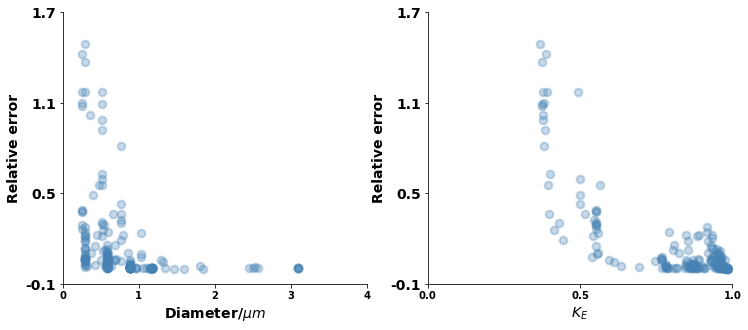

In [118]:
## estamted error
estimated_lambdas_apic= np.loadtxt("estimated_lambdas_passive_apicloc109_fE1e4.txt")
estimated_lambdas_apic_rise = -1./estimated_lambdas_apic[:,0]
estimated_lambdas_apic_decay = -1./estimated_lambdas_apic[:,1]

estimated_lambdas_dend= np.loadtxt("estimated_lambdas_passive_dendloc84_fE1e4.txt")
estimated_lambdas_dend_rise = -1./estimated_lambdas_dend[:,0]
estimated_lambdas_dend_decay = -1./estimated_lambdas_dend[:,1]


rise_truth = 1.0
error_rise_dend = np.abs(estimated_lambdas_dend_rise - rise_truth)/rise_truth
error_rise_apic = np.abs(estimated_lambdas_apic_rise - rise_truth)/rise_truth
decay_truth = 5.0
error_decay_dend = np.abs(estimated_lambdas_dend_decay - decay_truth)/decay_truth
error_decay_apic = np.abs(estimated_lambdas_apic_decay - decay_truth)/decay_truth


# diameter
diameters_dend=np.zeros_like(error_rise_dend)
diameters_apic = np.zeros_like(error_rise_apic)
for i in range(len(L5PC.dend)):
    diameters_dend[i] = L5PC.dend[i].diam
for i in range(len(L5PC.apic)):
    diameters_apic[i] = L5PC.apic[i].diam
    
    
# KE
KE_dend = np.loadtxt('KE_dend.txt')
KE_apic = np.loadtxt('KE_apic.txt')
    
s0 = 60
fontsize=14
color = 'steelblue'
    
fig, ax = plt.subplots(1,2, figsize = (12,5))
plot_curve(ax[0], diameters_dend, error_rise_dend, color=color,title='', linestyle='-',xlim=[],dx=0,
               ylim=[0,10],dy=.0, fontsize=fontsize, alpha = 0.3, xlabel='Diameter/'+'$\mu m$', 
               ylabel = 'relative error', label='', ynum_decimals =1, 
               nonscatter=False, s0=s0)
plot_curve(ax[0], diameters_apic, error_rise_apic, color=color,title='', linestyle='-',xlim=[0,4],dx=1,
               ylim=[-0.1,1.7],dy=0.6, fontsize=fontsize, alpha = 0.3, xlabel='Diameter/'+'$\mu m$', 
               ylabel = 'Relative error', label='', ynum_decimals =1, 
               nonscatter=False, s0=s0)


plot_curve(ax[1], KE_dend, error_rise_dend, color=color,title='', linestyle='-',xlim=[],dx=0,
               ylim=[0,10],dy=.0, fontsize=fontsize, alpha = 0.3, xlabel='Diameter/'+'$\mu m$', 
               ylabel = 'relative error', label='', ynum_decimals =1, 
               nonscatter=False, s0=s0)
plot_curve(ax[1], KE_apic, error_rise_apic, color=color,title='', linestyle='-',xlim=[0,1],dx=0.5,
               ylim=[-0.1,1.7],dy=0.6, fontsize=fontsize, alpha = 0.3, xlabel='$K_E$', 
               ylabel = 'Relative error', label='', ynum_decimals =1, 
               nonscatter=False, s0=s0)

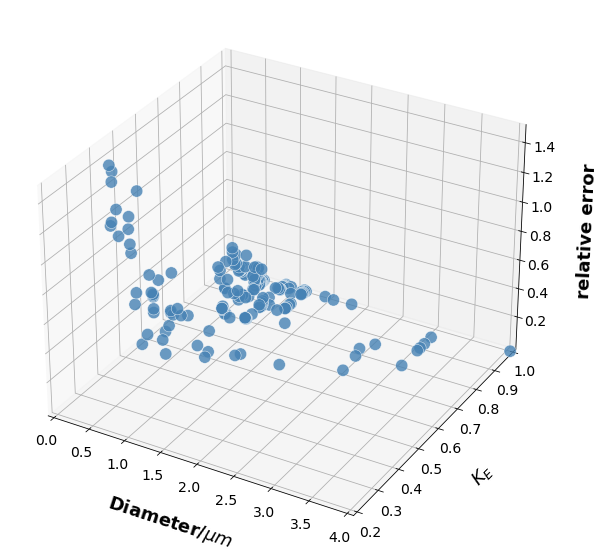

In [67]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure( figsize = (10,10))
ax2 = fig.add_subplot(111,projection='3d')
diameters = np.concatenate((diameters_dend, diameters_apic))
KE = np.concatenate((KE_dend, KE_apic))
error_rise = np.concatenate((error_rise_dend, error_rise_apic))

x = diameters
y = KE
z=error_rise
color='steelblue'
xlim=[0,4]
dx=2
ylim=[0.2,1]
dy=.5
fontsize=18
alpha = 0.8
xlabel='Diameter/'+'$\mu m$'
ylabel = '$K_E$'
zlabel = 'relative error'
ynum_decimals =1
s0=150


# 绘制三维散点图
sc = ax2.scatter(x, y, z, color=color, alpha=alpha, s=s0, edgecolor='w', linewidth=0.5)

# 设置坐标轴标签
ax2.set_xlabel(xlabel, fontsize=fontsize, weight='bold', labelpad=20)
ax2.set_ylabel(ylabel, fontsize=fontsize, weight='bold', labelpad=20)
ax2.set_zlabel(zlabel, fontsize=fontsize, weight='bold', labelpad=20)

# 设置坐标轴范围
ax2.set_xlim(xlim)
ax2.set_ylim(ylim)
ax2.set_zlim([min(z), max(z)])

# 美化刻度
ax2.tick_params(axis='both', which='major', labelsize=fontsize-4)
ax2.tick_params(axis='z', which='major', labelsize=fontsize-4)

# 添加网格
ax2.grid(True, linestyle='--', alpha=0.5)

# 显示图形
plt.show()




In [91]:
def plot_error_x_y(ax2, x = diameters, y = KE, z=error_rise, color='steelblue', xlim=[0,4],dx=2, ylim=[0.2,1], dy=0.5,
fontsize=18,
alpha = 0.8,
xlabel='Diameter/'+'$\mu m$',
ylabel = '$K_E$',
zlabel = 'relative error',
ynum_decimals =1,
s0=150, title=''):


    # 绘制三维散点图
    ax2.scatter(x, y, z, color=color, alpha=alpha, s=s0, edgecolor='w', linewidth=0.5)

    # 设置坐标轴标签
    ax2.set_xlabel(xlabel, fontsize=fontsize, weight='bold', labelpad=20)
    ax2.set_ylabel(ylabel, fontsize=fontsize, weight='bold', labelpad=20)
    ax2.set_zlabel(zlabel, fontsize=fontsize, weight='bold', labelpad=20)
    ax2.set_title('{0}'.format(title),fontsize=12,weight='bold')

    # 设置坐标轴范围
    ax2.set_xlim(xlim)
    ax2.set_ylim(ylim)
    ax2.set_zlim([min(z), max(z)])

    # 美化刻度
    ax2.tick_params(axis='both', which='major', labelsize=fontsize-4)
    ax2.tick_params(axis='z', which='major', labelsize=fontsize-4)

    # 添加网格
    ax2.grid(True, linestyle='--', alpha=0.5)
    # 调整布局
    plt.tight_layout()

    # 显示图形
    plt.show()


0.0746802999053033


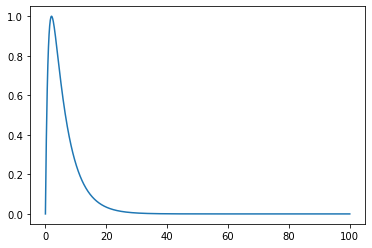

In [72]:
run_dt=0.1
syn_tau1 = 1.
syn_tau2 = 5.
fE = 1e-3
t=np.arange(0,100+run_dt,run_dt)
NE = ((syn_tau1/syn_tau2)**(syn_tau1/(syn_tau2-syn_tau1))-(syn_tau1/syn_tau2)**(syn_tau2/(syn_tau2-syn_tau1)))**-1
uE = NE*(np.exp(-t/syn_tau2)-np.exp(-t/syn_tau1))
plt.plot(t,uE)
ground_truth = np.mean(uE)
print(ground_truth)

In [116]:
# _gIhbar_Ih0_05
estimated_mean_cond_apic= np.loadtxt("/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/local_conductance/estimated_mean_cond_passive_apicloc109_fE1e4.txt")
estimated_mean_cond_us_apic = estimated_mean_cond_apic[:,0]


estimated_mean_cond_dend= np.loadtxt("/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/local_conductance/estimated_mean_cond_passive_dendloc84_fE1e4.txt")
estimated_mean_cond_us_dend = estimated_mean_cond_dend[:,0]

fE = 1e-4

error_mean_local_dend = np.abs(estimated_mean_cond_us_dend - ground_truth*fE)/(ground_truth*fE)
error_mean_local_apic = np.abs(estimated_mean_cond_us_apic - ground_truth*fE)/(ground_truth*fE)

In [105]:
# 定义 plot_error_x_y 函数
def plot_error_x_y(ax, x, y, z, color, xlim, dx, ylim,  dy, fontsize, alpha, xlabel, ylabel, zlabel, ynum_decimals, s0, title,zlim=[]):
    sc = ax.scatter(x, y, z, color=color, alpha=alpha, s=s0, edgecolor='w', linewidth=0.5)
    ax.set_xlabel(xlabel, fontsize=fontsize, weight='bold', labelpad=20)
    ax.set_ylabel(ylabel, fontsize=fontsize, weight='bold', labelpad=20)
    ax.set_zlabel(zlabel, fontsize=fontsize, weight='bold', labelpad=20)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    if zlim:
        ax.set_zlim(zlim)
    ax.tick_params(axis='both', which='major', labelsize=fontsize-2)
    ax.tick_params(axis='z', which='major', labelsize=fontsize-2)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_title(title, fontsize=fontsize+2, weight='bold')

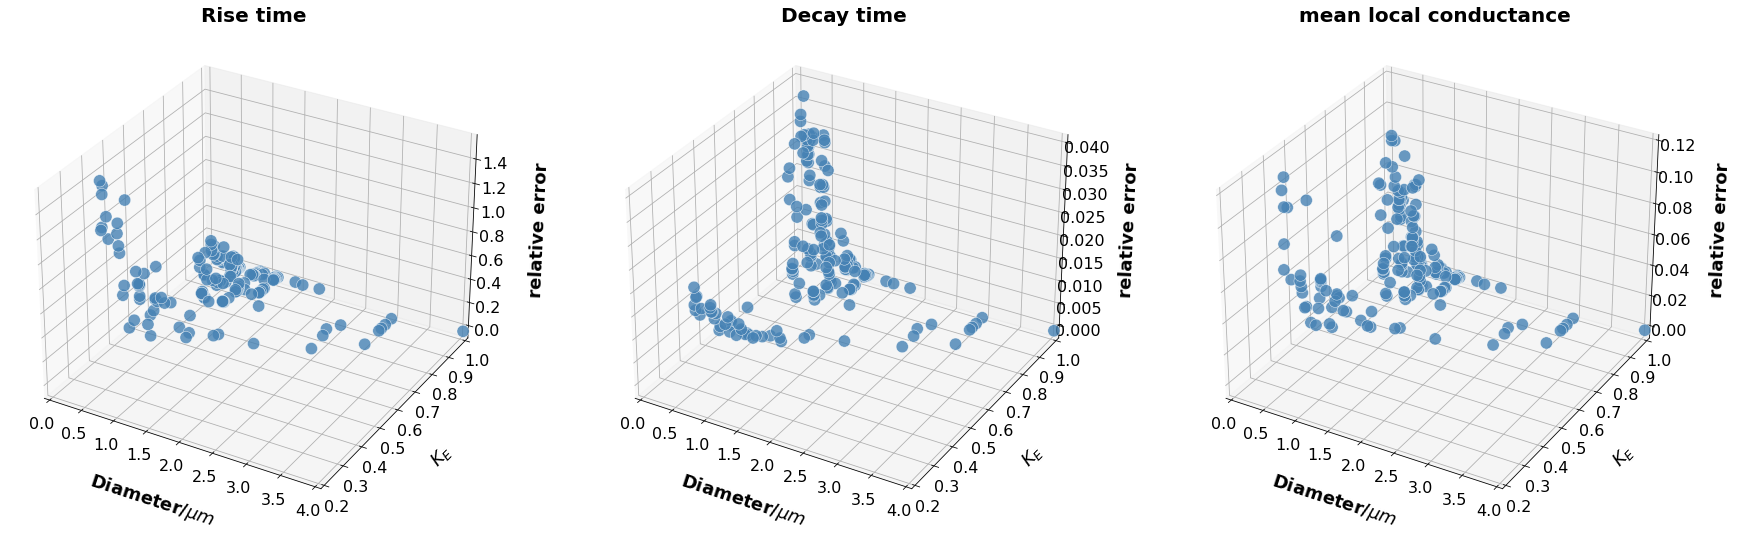

In [119]:
fig = plt.figure( figsize = (30,10))
error_rise = np.concatenate((error_rise_dend, error_rise_apic))
error_decay = np.concatenate((error_decay_dend, error_decay_apic))
error_mean_local = np.concatenate((error_mean_local_dend, error_mean_local_apic))
error_total = np.zeros((len(error_rise),3))
error_total[:,0] = error_rise
error_total[:,1] = error_decay
error_total[:,2] = error_mean_local
title = ['Rise time','Decay time','mean local conductance']
ax1 = fig.add_subplot(1,3,1,projection='3d')
ax2 = fig.add_subplot(1,3,2,projection='3d')
ax3 = fig.add_subplot(1,3,3,projection='3d')

plot_error_x_y(ax1, x = diameters, y = KE, z=error_total[:,0], color='steelblue', xlim=[0,4],dx=2, ylim=[0.2,1], dy=0.5,fontsize=18,
    alpha = 0.8,
    xlabel='Diameter/'+'$\mu m$',
    ylabel = '$K_E$',
    zlabel = 'relative error',
    ynum_decimals =1,
    s0=150, title = title[0])

plot_error_x_y(ax2, x = diameters, y = KE, z=error_total[:,1], color='steelblue', xlim=[0,4],dx=2, ylim=[0.2,1], dy=0.5,fontsize=18,
    alpha = 0.8,
    xlabel='Diameter/'+'$\mu m$',
    ylabel = '$K_E$',
    zlabel = 'relative error',
    ynum_decimals =1,
    s0=150, title = title[1])

plot_error_x_y(ax3, x = diameters, y = KE, z=error_total[:,2], color='steelblue', xlim=[0,4],dx=2, ylim=[0.2,1], dy=0.5,fontsize=18,
    alpha = 0.8,
    xlabel='Diameter/'+'$\mu m$',
    ylabel = '$K_E$',
    zlabel = 'relative error',
    ynum_decimals =1,
    s0=150, title = title[2])

# active

In [108]:
# _gIhbar_Ih0_05
estimated_mean_cond_apic= np.loadtxt("/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/local_conductance/estimated_mean_cond_active_apicloc109_fE1e4_gIhbar_Ih0_05.txt")
estimated_mean_cond_us_apic = estimated_mean_cond_apic[:,0]

estimated_mean_cond_dend= np.loadtxt("/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/local_conductance/estimated_mean_cond_active_dendloc84_fE1e4_gIhbar_Ih0_05.txt")
estimated_mean_cond_us_dend = estimated_mean_cond_dend[:,0]

fE = 1e-4

error_mean_local_dend = np.abs(estimated_mean_cond_us_dend - ground_truth*fE)/(ground_truth*fE)
error_mean_local_apic = np.abs(estimated_mean_cond_us_apic - ground_truth*fE)/(ground_truth*fE)

estimated_lambdas_apic= np.loadtxt("estimated_lambdas_active_apicloc109_fE1e4_gIhbar_Ih0_05.txt")
estimated_lambdas_apic_rise = -1./estimated_lambdas_apic[:,0]
estimated_lambdas_apic_decay = -1./estimated_lambdas_apic[:,1]

estimated_lambdas_dend= np.loadtxt("estimated_lambdas_active_dendloc84_fE1e4_gIhbar_Ih0_05.txt")
estimated_lambdas_dend_rise = -1./estimated_lambdas_dend[:,0]
estimated_lambdas_dend_decay = -1./estimated_lambdas_dend[:,1]


rise_truth = 1.0
error_rise_dend = np.abs(estimated_lambdas_dend_rise - rise_truth)/rise_truth
error_rise_apic = np.abs(estimated_lambdas_apic_rise - rise_truth)/rise_truth
decay_truth = 5.0
error_decay_dend = np.abs(estimated_lambdas_dend_decay - decay_truth)/decay_truth
error_decay_apic = np.abs(estimated_lambdas_apic_decay - decay_truth)/decay_truth




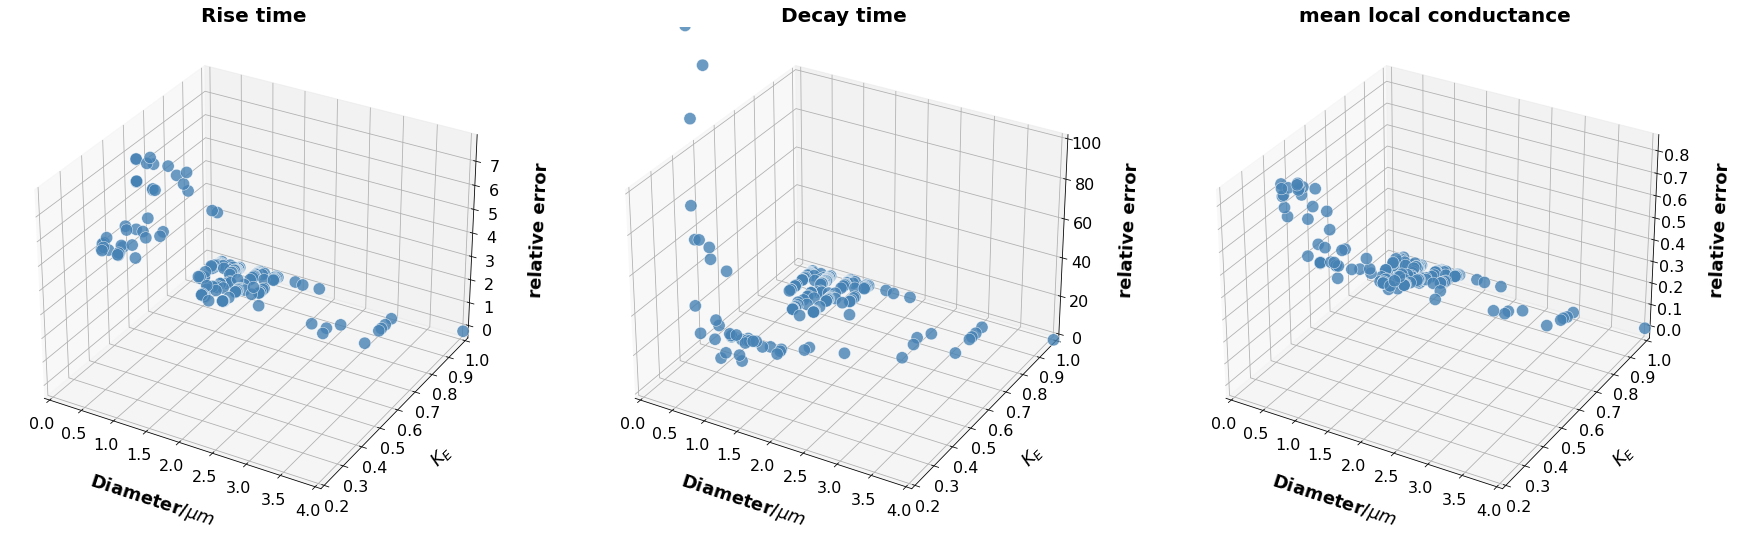

In [109]:
fig = plt.figure( figsize = (30,10))
error_rise = np.concatenate((error_rise_dend, error_rise_apic))
error_decay = np.concatenate((error_decay_dend, error_decay_apic))
error_mean_local = np.concatenate((error_mean_local_dend, error_mean_local_apic))
error_total = np.zeros((len(error_rise),3))
error_total[:,0] = error_rise
error_total[:,1] = error_decay
error_total[:,2] = error_mean_local
title = ['Rise time','Decay time','mean local conductance']
ax1 = fig.add_subplot(1,3,1,projection='3d')
ax2 = fig.add_subplot(1,3,2,projection='3d')
ax3 = fig.add_subplot(1,3,3,projection='3d')

plot_error_x_y(ax1, x = diameters, y = KE, z=error_total[:,0], color='steelblue', xlim=[0,4],dx=2, ylim=[0.2,1], dy=0.5,fontsize=18,
    alpha = 0.8,
    xlabel='Diameter/'+'$\mu m$',
    ylabel = '$K_E$',
    zlabel = 'relative error',
    ynum_decimals =1,
    s0=150, title = title[0])

plot_error_x_y(ax2, x = diameters, y = KE, z=error_total[:,1], color='steelblue', xlim=[0,4],dx=2, ylim=[0.2,1], dy=0.5,fontsize=18,
    alpha = 0.8,
    xlabel='Diameter/'+'$\mu m$',
    ylabel = '$K_E$',
    zlabel = 'relative error',
    ynum_decimals =1,
    s0=150, title = title[1], zlim=[0,100])

plot_error_x_y(ax3, x = diameters, y = KE, z=error_total[:,2], color='steelblue', xlim=[0,4],dx=2, ylim=[0.2,1], dy=0.5,fontsize=18,
    alpha = 0.8,
    xlabel='Diameter/'+'$\mu m$',
    ylabel = '$K_E$',
    zlabel = 'relative error',
    ynum_decimals =1,
    s0=150, title = title[2])

# together

In [136]:
KE_passive_total = np.loadtxt('KE_passive.txt')
KE_active_total = np.loadtxt('KE_activegIhbar_Ih0_05.txt')
np.shape(KE_passive_total)
KE_passive=[]
KE_active=[]
L5PC = h.L5PCtemplate(morphologyFilename)
i=0
for sec in h.allsec():
    for seg in sec:
        seg.v = KE_passive_total[i]
        i=i+1
for i in range(84):
    KE_passive.append(L5PC.dend[i].v)
for i in range(109):
    KE_passive.append(L5PC.apic[i].v)
i=0
for sec in h.allsec():
    for seg in sec:
        seg.v = KE_active_total[i]
        i=i+1
for i in range(84):
    KE_active.append(L5PC.dend[i].v)
for i in range(109):
    KE_active.append(L5PC.apic[i].v)

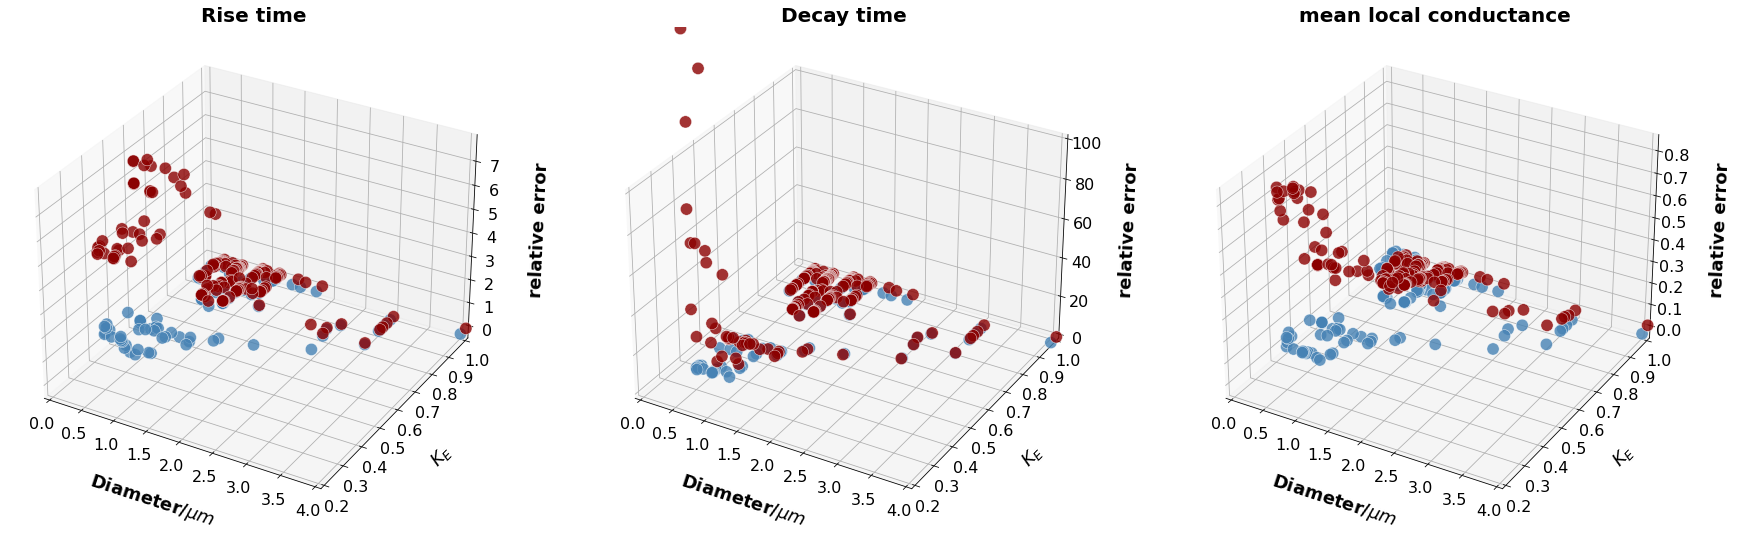

In [143]:
# _gIhbar_Ih0_05
estimated_mean_cond_apic_active= np.loadtxt("/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/local_conductance/estimated_mean_cond_active_apicloc109_fE1e4_gIhbar_Ih0_05.txt")
estimated_mean_cond_us_apic_active = estimated_mean_cond_apic_active[:,0]

estimated_mean_cond_dend_active= np.loadtxt("/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/local_conductance/estimated_mean_cond_active_dendloc84_fE1e4_gIhbar_Ih0_05.txt")
estimated_mean_cond_us_dend_active = estimated_mean_cond_dend_active[:,0]

fE = 1e-4

error_mean_local_dend_active = np.abs(estimated_mean_cond_us_dend_active - ground_truth*fE)/(ground_truth*fE)
error_mean_local_apic_active = np.abs(estimated_mean_cond_us_apic_active - ground_truth*fE)/(ground_truth*fE)

estimated_lambdas_apic_active= np.loadtxt("estimated_lambdas_active_apicloc109_fE1e4_gIhbar_Ih0_05.txt")
estimated_lambdas_apic_rise_active = -1./estimated_lambdas_apic_active[:,0]
estimated_lambdas_apic_decay_active = -1./estimated_lambdas_apic_active[:,1]

estimated_lambdas_dend_active= np.loadtxt("estimated_lambdas_active_dendloc84_fE1e4_gIhbar_Ih0_05.txt")
estimated_lambdas_dend_rise_active = -1./estimated_lambdas_dend_active[:,0]
estimated_lambdas_dend_decay_active = -1./estimated_lambdas_dend_active[:,1]


rise_truth = 1.0
error_rise_dend_active = np.abs(estimated_lambdas_dend_rise_active - rise_truth)/rise_truth
error_rise_apic_active = np.abs(estimated_lambdas_apic_rise_active - rise_truth)/rise_truth
decay_truth = 5.0
error_decay_dend_active = np.abs(estimated_lambdas_dend_decay_active - decay_truth)/decay_truth
error_decay_apic_active = np.abs(estimated_lambdas_apic_decay_active - decay_truth)/decay_truth

error_rise_active = np.concatenate((error_rise_dend_active, error_rise_apic_active))
error_decay_active = np.concatenate((error_decay_dend_active, error_decay_apic_active))
error_mean_local_active = np.concatenate((error_mean_local_dend_active, error_mean_local_apic_active))
error_total_active = np.zeros((len(error_rise_active),3))
error_total_active[:,0] = error_rise_active
error_total_active[:,1] = error_decay_active
error_total_active[:,2] = error_mean_local_active




# passive
# _gIhbar_Ih0_05
estimated_mean_cond_apic_passive= np.loadtxt("/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/local_conductance/estimated_mean_cond_passive_apicloc109_fE1e4.txt")
estimated_mean_cond_us_apic_passive = estimated_mean_cond_apic_passive[:,0]

estimated_mean_cond_dend_passive= np.loadtxt("/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/local_conductance/estimated_mean_cond_passive_dendloc84_fE1e4.txt")
estimated_mean_cond_us_dend_passive = estimated_mean_cond_dend_passive[:,0]

fE = 1e-4

error_mean_local_dend_passive = np.abs(estimated_mean_cond_us_dend_passive - ground_truth*fE)/(ground_truth*fE)
error_mean_local_apic_passive = np.abs(estimated_mean_cond_us_apic_passive - ground_truth*fE)/(ground_truth*fE)

estimated_lambdas_apic_passive= np.loadtxt("estimated_lambdas_passive_apicloc109_fE1e4.txt")
estimated_lambdas_apic_rise_passive = -1./estimated_lambdas_apic_passive[:,0]
estimated_lambdas_apic_decay_passive = -1./estimated_lambdas_apic_passive[:,1]

estimated_lambdas_dend_passive= np.loadtxt("estimated_lambdas_passive_dendloc84_fE1e4.txt")
estimated_lambdas_dend_rise_passive = -1./estimated_lambdas_dend_passive[:,0]
estimated_lambdas_dend_decay_passive = -1./estimated_lambdas_dend_passive[:,1]


rise_truth = 1.0
error_rise_dend_passive = np.abs(estimated_lambdas_dend_rise_passive - rise_truth)/rise_truth
error_rise_apic_passive = np.abs(estimated_lambdas_apic_rise_passive - rise_truth)/rise_truth
decay_truth = 5.0
error_decay_dend_passive = np.abs(estimated_lambdas_dend_decay_passive - decay_truth)/decay_truth
error_decay_apic_passive = np.abs(estimated_lambdas_apic_decay_passive - decay_truth)/decay_truth

error_rise_passive = np.concatenate((error_rise_dend_passive, error_rise_apic_passive))
error_decay_passive = np.concatenate((error_decay_dend_passive, error_decay_apic_passive))
error_mean_local_passive = np.concatenate((error_mean_local_dend_passive, error_mean_local_apic_passive))
error_total_passive = np.zeros((len(error_rise_passive),3))
error_total_passive[:,0] = error_rise_passive
error_total_passive[:,1] = error_decay_passive
error_total_passive[:,2] = error_mean_local_passive



fig = plt.figure( figsize = (30,10))

ax1 = fig.add_subplot(1,3,1,projection='3d')
ax2 = fig.add_subplot(1,3,2,projection='3d')
ax3 = fig.add_subplot(1,3,3,projection='3d')

color0 ='steelblue'

plot_error_x_y(ax1, x = diameters, y = KE_passive, z=error_total_passive[:,0], color=color0, xlim=[0,4],dx=2, ylim=[0.2,1], dy=0.5,fontsize=18,
    alpha = 0.8,
    xlabel='Diameter/'+'$\mu m$',
    ylabel = '$K_E$',
    zlabel = 'relative error',
    ynum_decimals =1,
    s0=150, title = title[0])

plot_error_x_y(ax2, x = diameters, y = KE_passive, z=error_total_passive[:,1], color=color0, xlim=[0,4],dx=2, ylim=[0.2,1], dy=0.5,fontsize=18,
    alpha = 0.8,
    xlabel='Diameter/'+'$\mu m$',
    ylabel = '$K_E$',
    zlabel = 'relative error',
    ynum_decimals =1,
    s0=150, title = title[1], zlim=[])

plot_error_x_y(ax3, x = diameters, y = KE_passive, z=error_total_passive[:,2], color=color0, xlim=[0,4],dx=2, ylim=[0.2,1], dy=0.5,fontsize=18,
    alpha = 0.8,
    xlabel='Diameter/'+'$\mu m$',
    ylabel = '$K_E$',
    zlabel = 'relative error',
    ynum_decimals =1,
    s0=150, title = title[2])

color1='darkred'

plot_error_x_y(ax1, x = diameters, y = KE_active, z=error_total_active[:,0], color=color1, xlim=[0,4],dx=2, ylim=[0.2,1], dy=0.5,fontsize=18,
    alpha = 0.8,
    xlabel='Diameter/'+'$\mu m$',
    ylabel = '$K_E$',
    zlabel = 'relative error',
    ynum_decimals =1,
    s0=150, title = title[0])

plot_error_x_y(ax2, x = diameters, y = KE_active, z=error_total_active[:,1], color=color1, xlim=[0,4],dx=2, ylim=[0.2,1], dy=0.5,fontsize=18,
    alpha = 0.8,
    xlabel='Diameter/'+'$\mu m$',
    ylabel = '$K_E$',
    zlabel = 'relative error',
    ynum_decimals =1,
    s0=150, title = title[1], zlim=[0,100])

plot_error_x_y(ax3, x = diameters, y = KE_active, z=error_total_active[:,2], color=color1, xlim=[0,4],dx=2, ylim=[0.2,1], dy=0.5,fontsize=18,
    alpha = 0.8,
    xlabel='Diameter/'+'$\mu m$',
    ylabel = '$K_E$',
    zlabel = 'relative error',
    ynum_decimals =1,
    s0=150, title = title[2])

In [137]:
print(KE_passive)

[0.968989366079808, 0.9647723444684997, 0.9404771939480466, 0.9613707199264214, 0.9529685480951801, 0.9322989659110448, 0.945876793162422, 0.9710190330429078, 0.9708797318326648, 0.9710989982187075, 0.96527276320038, 0.9698927325515683, 0.9667839572875685, 0.9179359521686069, 0.9479287200726237, 0.9700335667082117, 0.9687865182844274, 0.9674688374530866, 0.9679981842025573, 0.9672306333391414, 0.9672833847893962, 0.9668713334036518, 0.9624632046407695, 0.9585538218355062, 0.9579925459030513, 0.9629718417691763, 0.9529495333179613, 0.9437416268932156, 0.9309470840067094, 0.9550321662267112, 0.9458416432625137, 0.9190419384377496, 0.9357900303812828, 0.9464015702725649, 0.9675715516776623, 0.9481828874758416, 0.9590586475188002, 0.9354939340339248, 0.9478371807219453, 0.9634346308183753, 0.945775868327848, 0.9509798736969256, 0.9677127150661468, 0.9670801121565246, 0.9608979884433152, 0.9593815835894272, 0.9647147357166082, 0.9626834499826411, 0.9584994292166676, 0.9523804857102552, 0.95